<a href="https://colab.research.google.com/github/Karthikg1908/Image-Features-Described-in-Audio-for-Accessibility/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Required Libraries

!pip install transformers datasets torch torchvision pillow tqdm
!pip install google-cloud-translate
!pip install googletrans==4.0.0-rc1
!pip install gtts


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Download the Flickr8k Dataset

!kaggle datasets download -d adityajn105/flickr8k


Dataset URL: https://www.kaggle.com/datasets/adityajn105/flickr8k
License(s): CC0-1.0
 98% 1.02G/1.04G [00:07<00:00, 178MB/s]
100% 1.04G/1.04G [00:07<00:00, 151MB/s]


In [3]:
# Extract the Dataset

import zipfile

zip_path = '/content/flickr8k.zip'  # Update if needed
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [4]:
# Load Libraries and Define Functions

from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, GPT2Tokenizer, MarianMTModel, MarianTokenizer
from PIL import Image
import matplotlib.pyplot as plt
from googletrans import Translator
from gtts import gTTS
import IPython.display as ipd

# Load models
caption_model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
caption_tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

def load_translation_model_kn():
    model_name_kn = 'Helsinki-NLP/opus-mt-en-kn'
    translation_model_kn = MarianMTModel.from_pretrained(model_name_kn)
    translation_tokenizer_kn = MarianTokenizer.from_pretrained(model_name_kn)
    return translation_model_kn, translation_tokenizer_kn

def translate_to_kannada(text):
    translator = Translator()
    translated = translator.translate(text, src='en', dest='kn')
    return translated.text

def translate_to_hindi(text):
    translator = Translator()
    translated = translator.translate(text, src='en', dest='hi')
    return translated.text

def text_to_speech(text, lang='en'):
    tts = gTTS(text=text, lang=lang, slow=False)
    tts.save("caption.mp3")
    return "caption.mp3"

def generate_caption(image_path):
    image = Image.open(image_path).convert("RGB")
    pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
    outputs = caption_model.generate(pixel_values, max_length=16, num_beams=4, early_stopping=True)
    caption = caption_tokenizer.decode(outputs[0], skip_special_tokens=True)
    return caption


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Caption in English: a black dog and a brown dog playing in a yard 
Caption in Kannada: ಒಂದು ಅಂಗಳದಲ್ಲಿ ಆಡುವ ಕಪ್ಪು ನಾಯಿ ಮತ್ತು ಕಂದು ನಾಯಿ
Caption in Hindi: एक काला कुत्ता और एक भूरा कुत्ता एक यार्ड में खेल रहा है


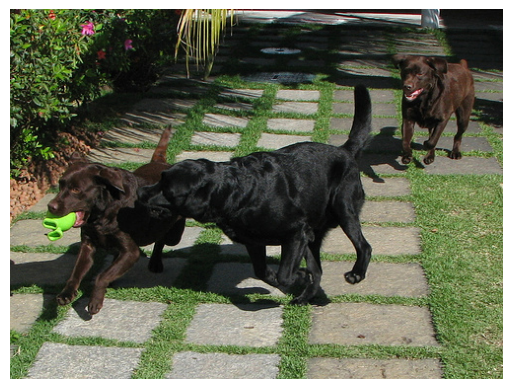

In [10]:
# Generate Caption and Translate

# Example image 1
image_path = '/content/Images/1454678644_7e5a371301.jpg'  # Update with correct path

# Generate caption in English
caption = generate_caption(image_path)
print(f"Caption in English: {caption}")

# Translate caption to Kannada
translated_caption_kn = translate_to_kannada(caption)
print(f"Caption in Kannada: {translated_caption_kn}")

# Translate caption to Hindi
translated_caption_hi = translate_to_hindi(caption)
print(f"Caption in Hindi: {translated_caption_hi}")

# Convert captions to speech and play them
audio_en = text_to_speech(caption, lang='en')
ipd.display(ipd.Audio(audio_en))

audio_kn = text_to_speech(translated_caption_kn, lang='kn')
ipd.display(ipd.Audio(audio_kn))

audio_hi = text_to_speech(translated_caption_hi, lang='hi')
ipd.display(ipd.Audio(audio_hi))

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


Caption in English: a black dog running across a grass covered field 
Caption in Kannada: ಹುಲ್ಲಿನ ಮುಚ್ಚಿದ ಹೊಲಕ್ಕೆ ಅಡ್ಡಲಾಗಿ ಚಲಿಸುವ ಕಪ್ಪು ನಾಯಿ
Caption in Hindi: एक काला कुत्ता एक घास से ढके मैदान में चल रहा है


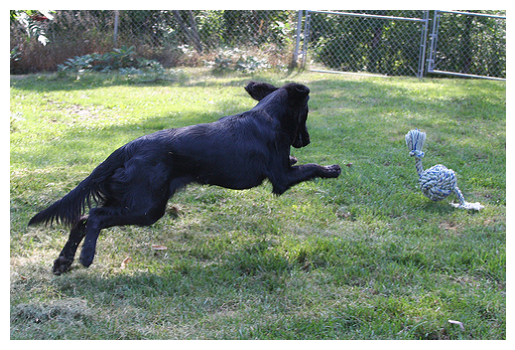

In [6]:
# Example 2

image_path = '/content/Images/1107246521_d16a476380.jpg'

caption = generate_caption(image_path)
print(f"Caption in English: {caption}")

translated_caption_kn = translate_to_kannada(caption)
print(f"Caption in Kannada: {translated_caption_kn}")

translated_caption_hi = translate_to_hindi(caption)
print(f"Caption in Hindi: {translated_caption_hi}")

audio_en = text_to_speech(caption, lang='en')
ipd.display(ipd.Audio(audio_en))

audio_kn = text_to_speech(translated_caption_kn, lang='kn')
ipd.display(ipd.Audio(audio_kn))

audio_hi = text_to_speech(translated_caption_hi, lang='hi')
ipd.display(ipd.Audio(audio_hi))

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


Caption in English: a woman standing on top of a sandy beach 
Caption in Kannada: ಮರಳು ಕಡಲತೀರದ ಮೇಲೆ ನಿಂತಿರುವ ಮಹಿಳೆ
Caption in Hindi: एक रेतीले समुद्र तट के ऊपर खड़ी एक महिला


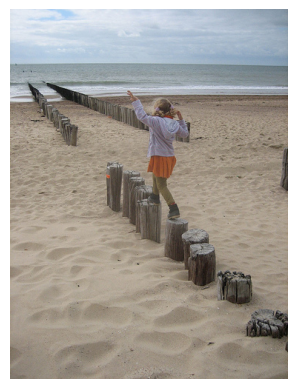

In [8]:
# Example 3

image_path = '/content/Images/1352410176_af6b139734.jpg'

caption = generate_caption(image_path)
print(f"Caption in English: {caption}")

translated_caption_kn = translate_to_kannada(caption)
print(f"Caption in Kannada: {translated_caption_kn}")

translated_caption_hi = translate_to_hindi(caption)
print(f"Caption in Hindi: {translated_caption_hi}")

audio_en = text_to_speech(caption, lang='en')
ipd.display(ipd.Audio(audio_en))

audio_kn = text_to_speech(translated_caption_kn, lang='kn')
ipd.display(ipd.Audio(audio_kn))

audio_hi = text_to_speech(translated_caption_hi, lang='hi')
ipd.display(ipd.Audio(audio_hi))

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


Caption in English: a woman is talking on a cell phone 
Caption in Kannada: ಒಬ್ಬ ಮಹಿಳೆ ಸೆಲ್ ಫೋನ್‌ನಲ್ಲಿ ಮಾತನಾಡುತ್ತಿದ್ದಾಳೆ
Caption in Hindi: एक महिला एक सेल फोन पर बात कर रही है


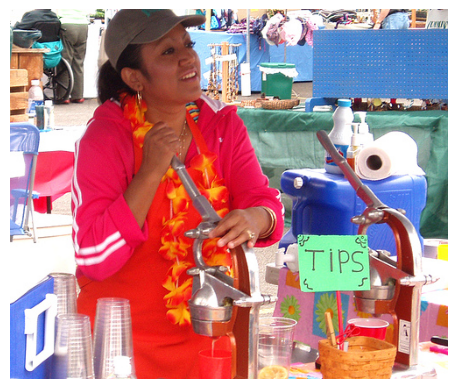

In [9]:
# Example 4

image_path = '/content/Images/141755290_4b954529f3.jpg'

caption = generate_caption(image_path)
print(f"Caption in English: {caption}")

translated_caption_kn = translate_to_kannada(caption)
print(f"Caption in Kannada: {translated_caption_kn}")

translated_caption_hi = translate_to_hindi(caption)
print(f"Caption in Hindi: {translated_caption_hi}")

audio_en = text_to_speech(caption, lang='en')
ipd.display(ipd.Audio(audio_en))

audio_kn = text_to_speech(translated_caption_kn, lang='kn')
ipd.display(ipd.Audio(audio_kn))

audio_hi = text_to_speech(translated_caption_hi, lang='hi')
ipd.display(ipd.Audio(audio_hi))

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


Caption in English: two children are flying a kite in a field 
Caption in Kannada: ಇಬ್ಬರು ಮಕ್ಕಳು ಮೈದಾನದಲ್ಲಿ ಗಾಳಿಪಟವನ್ನು ಹಾರಿಸುತ್ತಿದ್ದಾರೆ
Caption in Hindi: दो बच्चे एक मैदान में पतंग उड़ा रहे हैं


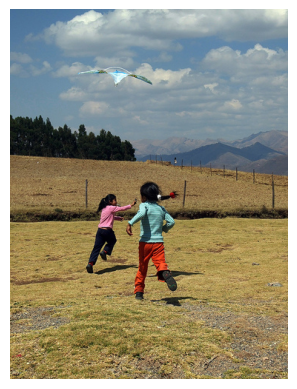

In [11]:
# Example 5

image_path = '/content/Images/1517807181_ca6588f2a0.jpg'

caption = generate_caption(image_path)
print(f"Caption in English: {caption}")

translated_caption_kn = translate_to_kannada(caption)
print(f"Caption in Kannada: {translated_caption_kn}")

translated_caption_hi = translate_to_hindi(caption)
print(f"Caption in Hindi: {translated_caption_hi}")

audio_en = text_to_speech(caption, lang='en')
ipd.display(ipd.Audio(audio_en))

audio_kn = text_to_speech(translated_caption_kn, lang='kn')
ipd.display(ipd.Audio(audio_kn))

audio_hi = text_to_speech(translated_caption_hi, lang='hi')
ipd.display(ipd.Audio(audio_hi))

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()
